In [2]:
import shapefile
from scripts.path_finders import get_transport_shp_path, get_division_path
from scripts.geo_utils import iter_shp_as_shapely, get_shapely_shapes
from scripts.reachability import *
from shapely.geometry import LineString, Point, Polygon, MultiPolygon

In [3]:
path_colectivos = get_transport_shp_path("recorrido-colectivos")
path_radios = get_division_path("radios_censo_2010")

In [4]:
sf_lines = shapefile.Reader(path_colectivos)
lines = get_shapely_shapes(sf_lines)

In [5]:
sf_polys = shapefile.Reader(path_radios)
polys = get_shapely_shapes(sf_polys)
ids = [record[0] for record in sf_polys.records()]
radios = {id: polygon for id, polygon in zip(ids, polys)}

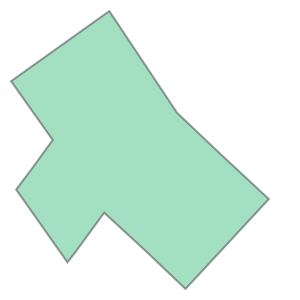

In [6]:
radio = radios["14_1_8"]
radio

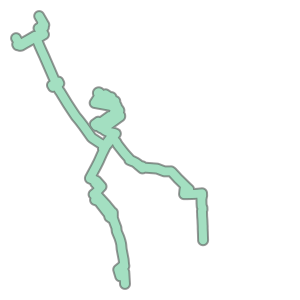

In [7]:
surface = get_reachable_surface(radio, lines)
surface

In [9]:
import cartopy.crs as ccrs
import cartopy
from scripts.geo_utils import prj_to_proj4
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt

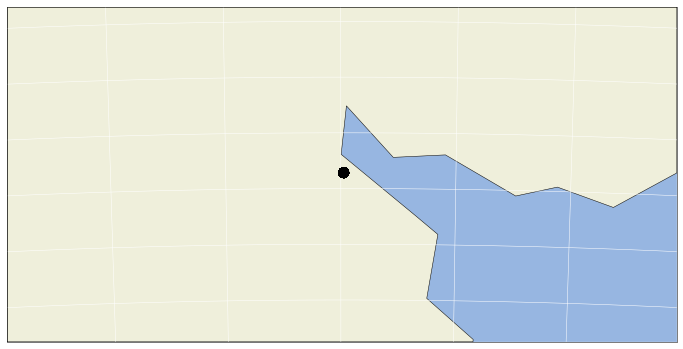

In [12]:
from scripts.geo_utils import GKBA_Proj, GKBA_PROJ
proj = GKBA_PROJ

fig = plt.figure(figsize=(12, 8), dpi=150)
ax = plt.axes(projection=proj)

ec = 'black'
fc = [0.9375, 0.9375, 0.859375]

ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax.gridlines()

ax.add_geometries([surface], proj, facecolor=fc, edgecolor=ec, linewidth=0.5, zorder=5)
ax.add_geometries(polys, proj, facecolor=fc, edgecolor=ec, linewidth=10.5, zorder=5)
#ax.add_geometries([Point(100000, 100000).buffer(3000)], proj, facecolor=fc, edgecolor=ec, linewidth=10.5, zorder=5)

In [13]:
polys = [poly.buffer(0) for poly in polys]
MultiPolygon(polys)

In [14]:
crs = prj_to_proj4(get_division_path("radios_censo_2010"))

In [15]:
crs.to_proj4()

'+proj=tmerc +ellps=intl +a=6378388.0 +f=297.0 +pm=0.0  +x_0=100000.0 +y_0=100000.0 +lon_0=-58.4627 +lat_0=-34.6297166 +units=m +to_meter=1.0 +axis=enu +no_defs'

In [16]:
params = [(i.split("=")[0].strip(), i.split("=")[1].strip()) for i in crs.to_proj4().split("+")[1:-1]]

In [17]:
params

[('proj', 'tmerc'),
 ('ellps', 'intl'),
 ('a', '6378388.0'),
 ('f', '297.0'),
 ('pm', '0.0'),
 ('x_0', '100000.0'),
 ('y_0', '100000.0'),
 ('lon_0', '-58.4627'),
 ('lat_0', '-34.6297166'),
 ('units', 'm'),
 ('to_meter', '1.0'),
 ('axis', 'enu')]